In [134]:
import pyscf
import ctypes
import numpy as np
from pyscf import dft
from pyscf import gto
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyscf import lib
from pyscf.dft import libxc
from pyscf.dft import numint
from pyscf.dft import xc_deriv

In [136]:
#LDA relies on getting the density from the grid, so need to make a grid. 
#want to modify the matplot defaults to better fit
import matplotlib as mpl
#psi4 tutorial values
mpl.rcParams["font.size"]=14
mpl.rcParams["text.color"]="grey"
mpl.rcParams["font.family"]="sans-serif"
mpl.rcParams["axes.edgecolor"]="#eae8e9"


In [138]:
#Before building a grid, need to do a regular calculation and build the H2 molecule

mol=gto.Mole()
mol.atom='''
    H 0 0 -1
    H 0 0 1
'''
#H2 on z-axis, cylindrical symmetry
mol.basis='cc-pvdz'
mol.symmetry=True
mol.build()
#no spin, since two electrons, so spin =0
#Run an SCF calculation with H2
mylda=dft.RKS(mol)
mylda.xc='lda,vwn' #for default LDA functionals, GGA would be type='gga', etc etc etc
mylda.kernel()


converged SCF energy = -0.973624043355693


np.float64(-0.9736240433556926)

In [164]:
#Now need to build the spherical grid
#grids are helpful to evaluate xc functional approx. (LDA)
#grid function will make a grid, get the weights from it
#default level is 3
grids=dft.gen_grid.Grids(mol)
#grids.level=3
grids.build(with_non0tab=True)


In [146]:
#grid built, retrieve components
weights = grids.weights #important for integrating and visualization
coords = grids.coords
newcoords = coords.T #transposing the matrix, flipping it on the diagonal, helps with calcs.
x,y,z = newcoords
#check coords (x, y, z)
print(x.shape) #dimensions of the matrix as a tuple (rows,columns)
#19616 rows

(19616,)


In [148]:
#Check coords again!! 
print(coords.shape[0]) #same as x
#shape[0] only returns # rows, not columns
print(coords)
print(newcoords.shape) #3 rows, 19616 columns
print(newcoords)

19616
[[-4.78914373 -4.78914373 -6.67886985]
 [-5.61840359 -5.61840359 -7.50812971]
 [-7.02641747 -7.02641747 -8.9161436 ]
 ...
 [ 8.05702634  8.05702634  6.16527061]
 [ 8.05702634  4.27554448  9.94675247]
 [ 4.27554448  8.05702634  9.94675247]]
(3, 19616)
[[-4.78914373 -5.61840359 -7.02641747 ...  8.05702634  8.05702634
   4.27554448]
 [-4.78914373 -5.61840359 -7.02641747 ...  8.05702634  4.27554448
   8.05702634]
 [-6.67886985 -7.50812971 -8.9161436  ...  6.16527061  9.94675247
   9.94675247]]


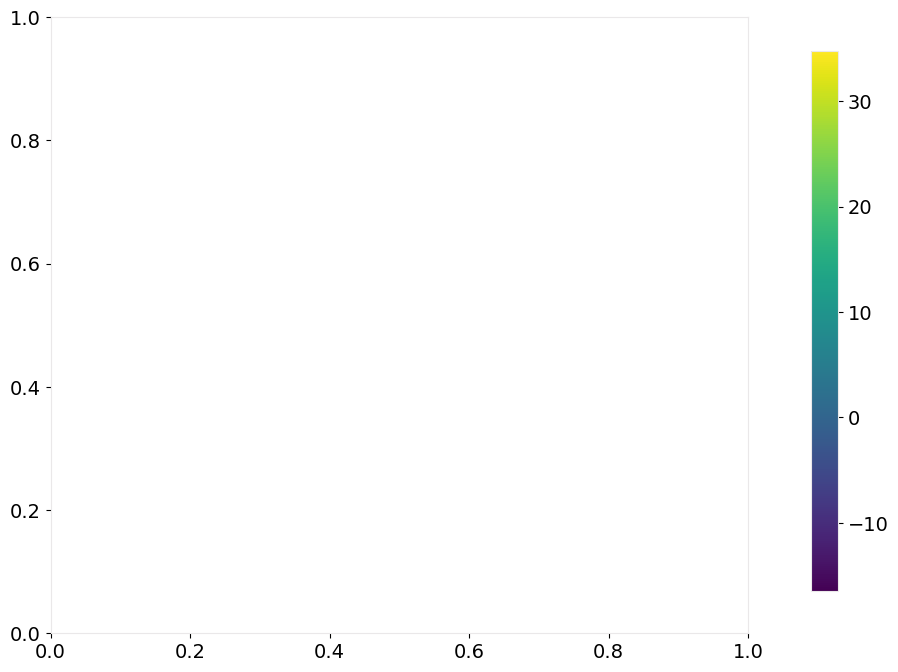

In [150]:
#Visualize the grid
fig=plt.figure(figsize=(9,8))
ax = Axes3D(fig) #for 3D grid
ax.set_axis_off()
p = ax.scatter(x,y,z, c=weights, s=10)
plt.colorbar(p, fraction=0.030, pad=0.04)

In [152]:
#Densier grid (higher level)

grids = dft.gen_grid.Grids(mol)
grids.level=7
grids.build(with_non0tab=True)

100344


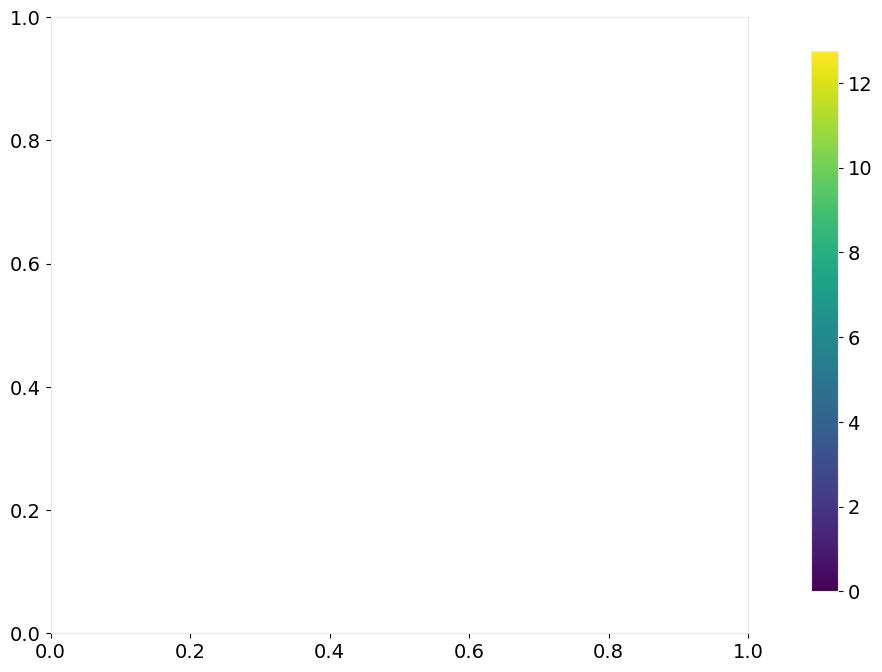

In [160]:
weights = grids.weights
coords = grids.coords
print(coords.shape[0]) #rows in the matrix
newcoords = coords.T #transpose
x, y, z = newcoords
fig = plt.figure(figsize=(9,8))
ax = Axes3D(fig)
ax.set_axis_off()
p = ax.scatter(x, y, z, c=weights, s=10)
plt.colorbar(p, fraction=0.030, pad=0.04)